#  Introduction
In this project we are going to apply k means nearest neighbor algorithm on car's dataset which can be found in following website https://archive.ics.uci.edu/ml/datasets/automobile. In this dataset we contain columns like fuel-type, fuel-system, num-of-cylinders etc.
We will be using pandas, sckit, and numpy packages fo visualizing and predicting the car price.

In [23]:
import pandas as pd
import numpy as np

cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data',names=cols)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Any machine learning algorithm except nlp depends mainly upon numerical values. So first of all we will find which are numerical columns from head of the data. Here we cannot use `pandas.select_dtypes` because there are some columns which contain '?' as character in them. So we will be selecting manually those columns values.

In [24]:
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[continuous_values_cols]
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


So after finding numeric columns our first task is to replace '?' this value with pands nan value or **`numpy.nan`** values which are equivalent. And after replacing lets' check datatypes of numeric_cars df to analyze the columns

In [25]:
numeric_cars.replace('?',np.nan,inplace=True)
numeric_cars.head()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


In [26]:
numeric_cars.dtypes

normalized-losses     object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
bore                  object
stroke                object
compression-rate     float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [27]:
numeric_cars = numeric_cars.astype(float)

In [28]:
numeric_cars.dtypes

normalized-losses    float64
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight          float64
bore                 float64
stroke               float64
compression-rate     float64
horsepower           float64
peak-rpm             float64
city-mpg             float64
highway-mpg          float64
price                float64
dtype: object

Now we have converted all numeric columns to float type. Now it is time to calculate the null value count in all columns and trying to find a way to replace those null values or directly droping null values from rows or dropping columns.

In [29]:
print(numeric_cars.isnull().sum())

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64


In [30]:
numeric_cars.shape[0]

205

Here we can see that price column has 4 values as missing and we have total 205 values in our data. So we can drop those 4 rows coresponding to price column as it is our predicting value and if we replace it with some arbit value it will add bias to our model so it is best practice to drop those 4 rows.
Alse we can see that normalized-losses has around 41 null values which is huge in our case. If we try to drop values from normalized-lossed then we will be losing around 1/4 of our data so we have only two choices either drop the column or replace missing values by mean.

In [31]:
normMean = numeric_cars['normalized-losses'].mean()
numeric_cars['normalized-losses'] = numeric_cars['normalized-losses'].fillna(normMean)


In [32]:
numeric_cars.dropna(inplace=True,axis=0)
print(numeric_cars.isnull().sum())

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


In [33]:
numeric_cars.shape[0]

195

### Normalization
As knn require to have some metric defined on it. There may be some column which can have large value compared to other in that case then that column will give more share to our metric and hence will make difficult to genralize knn for all features.
So in following case we are going to use this formula $$df = \frac{df.max()-df}{df.max()}$$
Reasons behind this normalization: 
1. Values can be nearly 0 also
2. So we are inverting the values by deleting those values from max
3. We want to map those values in range of 0,1 so we are dividing by max value

In [34]:
price = numeric_cars['price']
numeric_cars = (numeric_cars.max()-numeric_cars)/numeric_cars.max()
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.523438,0.267163,0.188852,0.109722,0.183946,0.373340,0.119289,0.357314,0.608696,0.576336,0.242424,0.571429,0.500000,0.702753
1,0.523438,0.267163,0.188852,0.109722,0.183946,0.373340,0.119289,0.357314,0.608696,0.576336,0.242424,0.571429,0.500000,0.636564
2,0.523438,0.218362,0.177319,0.090278,0.123746,0.305706,0.319797,0.167866,0.608696,0.412214,0.242424,0.612245,0.518519,0.636564
3,0.359375,0.174524,0.151370,0.080556,0.091973,0.425234,0.190355,0.184652,0.565217,0.610687,0.166667,0.510204,0.444444,0.692731
4,0.359375,0.177833,0.151370,0.077778,0.091973,0.305460,0.190355,0.184652,0.652174,0.561069,0.166667,0.632653,0.592593,0.615639


In [45]:
numeric_cars['price'] = price

## Univariate Training
After cleaning data and adjusting all values for our model now we are ready for prediction task. In this model we are direcly using sklearn for training and predicitng tasks.
The flow of our training task
1. First we are making the function which has 3 parameters namely dataframe, training variable, target varialble.
2. Then we are using numpy library for selecting random rows.
3. After this we are selecting training data and testing data. We are taking around 80 percent of data for training and 20 % for testing purpose.

In [77]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import mean_squared_error
def knn_train_test(df,train,target):
    np.random.seed(1)
    no_rows = df.shape[0]
    shuff = np.random.permutation(df.index)
    newdf = df.reindex(shuff)
    split_index = int(no_rows*0.8)
    train_df = newdf.iloc[0:split_index]
    test_df = newdf.iloc[split_index:]
    knn = KNeighborsRegressor()
    knn.fit(train_df[[train]],train_df[target])
    predict = knn.predict(test_df[[train]])
    rmse = mean_squared_error(test_df[target],predict)**0.5
    return rmse

In [110]:
ret_rmse = {}

for c in numeric_cars.columns.drop('price'):
    ret_rmse[c] = (knn_train_test(numeric_cars,c,'price'))
first_re = pd.Series(ret_rmse)
first_re.sort_values()

length               3827.473687
wheel-base           4272.990245
width                4634.187249
curb-weight          4671.833752
horsepower           4842.451293
highway-mpg          4906.780594
city-mpg             5158.567586
bore                 5516.176394
peak-rpm             6140.829238
stroke               6194.195679
normalized-losses    6266.863189
height               6320.879016
compression-rate     6654.749329
dtype: float64

Now we will modify the function such that it will ask for k value also. K value determines the number of neighbors which we will want for prediction task.

In [105]:
def knn_train_test_one(df,train,test,k):
    split = int(df.shape[0]*0.8)
    np.random.seed(1)
    shuff = np.random.permutation(df.index)
    newdf = df.reindex(shuff)
    train_df = newdf.iloc[:split]
    test_df = newdf.iloc[split:]
    rmse_values = list()
    for i in k:
        knn = KNeighborsRegressor(n_neighbors=i)
        knn.fit(train_df[[train]],train_df[[test]])
        pred = knn.predict(test_df[[train]])
        rmse = mean_squared_error(test_df[test],pred)**0.5
        rmse_values.append(rmse)
    return rmse_values

In [106]:
%matplotlib inline
import matplotlib.pyplot as plt

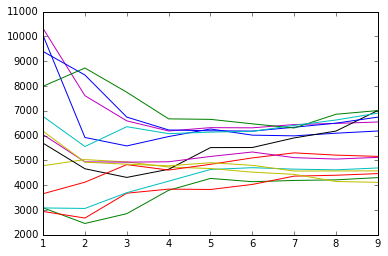

In [107]:
k_values = [i for i in range(1,10)]
train_cols = numeric_cars.columns.drop('price')
for col in train_cols:
    rmses = knn_train_test_one(numeric_cars,col,'price',k_values)
    plt.plot(k_values,rmses)
plt.show()

In above graph we can see that some variable have high eror while some has low error. This indicates we don't need all variables for prediction task we can use only some of the variables which has low error while predicting.

## Multivariate Model
Now our task is to design a multivariate model which we can use for training on multiple variables.

In [126]:
def knn_train_test_two(df,train,test):
    split = int(df.shape[0]*0.8)
    print(split,df.shape[0])
    np.random.seed(1)
    shuff = np.random.permutation(df.index)
    new_df = df.reindex(shuff)
    train_df = new_df.iloc[:split]
    test_df = new_df.iloc[split:]
    knn = KNeighborsRegressor()
    knn.fit(train_df[train],train_df[test])
    pred = knn.predict(test_df[train])
    rmse = mean_squared_error(test_df[test],pred)**0.5
    return rmse

We have got errors corresponding to different features for predicting price. Now we can use that list to have best features for predicting task.

In [127]:
feature_sel = first_re.sort_values().index.tolist()
#selecting best two features 
bestTwo = knn_train_test_two(numeric_cars,feature_sel[:2],'price')
bestTwo

156 195


4039.7662435547063

In [121]:
bestThree = knn_train_test_two(numeric_cars,feature_sel[:3],'price')
bestFour = knn_train_test_two(numeric_cars,feature_sel[:4],'price')
bestFive = knn_train_test_two(numeric_cars,feature_sel[:5],'price')

In [122]:
print(bestTwo,bestThree,bestFour,bestFive)

4181.71524788 3717.22250239 3674.32554481 3285.40125809


In [128]:
len(numeric_cars)

195

### Editing Multivariate Model
Now we have build the multivariate model lets use this for different neighbors and check the error.

In [129]:
def knn_train_test_three(df,train,test,k):
    split = int(df.shape[0]*0.8)
    np.random.seed(1)
    shuff = np.random.permutation(df.index)
    newdf = df.reindex(shuff)
    train_df = newdf.iloc[0:split]
    test_df = newdf.iloc[split:]
    rmses = {}
    for i in k:
        knn = KNeighborsRegressor(n_neighbors=i)
        knn.fit(train_df[train],train_df[test])
        pred = knn.predict(test_df[train])
        rmse = mean_squared_error(test_df[test],pred)**0.5
        rmses[i] = rmse
    return rmses

In [130]:
k_values = [i for i in range(1,26)]
threeBest = feature_sel[:3]
fourBest = feature_sel[:4]
fiveBest = feature_sel[:5]

In [137]:
knn_train_test_three(numeric_cars,threeBest,'price',k_values).values()

dict_values([3016.7216286252506, 2918.0484521732619, 3526.3081543492758, 3871.5935695302787, 3717.2225023944543, 3634.2797801841384, 3909.9206898130233, 4115.8508106870604, 4418.0472428094408, 4301.5223777050651, 4314.9128218666692, 4404.1554061504476, 4445.4142740549478, 4383.3044766038538, 4423.4394526588731, 4472.8051035777698, 4535.3535867127102, 4607.2010805834607, 4686.0240444154606, 4733.7723761463931, 4772.7734446214126, 4839.3164562981337, 4836.3042899775437, 4869.3143415778577, 4942.6716062614951])

In [132]:
rmse_best = {}
rmse_best['one'] = knn_train_test_three(numeric_cars,threeBest,'price',k_values)
rmse_best['two'] = knn_train_test_three(numeric_cars,fourBest,'price',k_values)
rmse_best['three'] = knn_train_test_three(numeric_cars,fiveBest,'price',k_values)

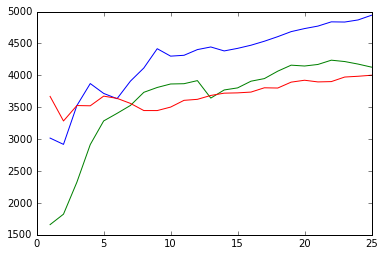

In [138]:
for k,v in rmse_best.items():
    x = list(v.keys())
    y = list(v.values())
    plt.plot(x,y)
plt.show()

In above window we are visualizing the multivariate model for different no. of features.